In [21]:
import sklearn.datasets
import sklearn
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype ссылка на датасет

In [29]:
covtype = sklearn.datasets.fetch_covtype()

df = pd.DataFrame( data = np.c_[covtype['data'], covtype['target']],
                      columns = covtype['feature_names'] + ['target'] )

df.target = df.target.astype( int )

df.head(15)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,6031.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,2606.0,45.0,7.0,270.0,5.0,633.0,222.0,225.0,138.0,6256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,2605.0,49.0,4.0,234.0,7.0,573.0,222.0,230.0,144.0,6228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
8,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,6244.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,2612.0,59.0,10.0,247.0,11.0,636.0,228.0,219.0,124.0,6230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


1. Многоклассовая классификация:

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [ ]:
df_X = df.drop(columns=['target'])
df_y = df['target']

# scaled_X = StandardScaler().fit_transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, data_y_pred))

0.5756369920070498


1.2. То же самое с использованием кросс-валидации

In [ ]:
from sklearn.model_selection import cross_val_score

df_X = df.drop(columns=['target'])
df_y = df['target']

# scaled_X = StandardScaler().fit_transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean())

# data_y_pred = clf.predict(X_test)

# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, data_y_pred))

0.5700628281813028


1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

In [30]:
df_X = df.drop(columns=['target'])
df_y = df['target']

# scaled_X = StandardScaler().fit_transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

list_n_estimators = [100, 150, 200, 250, 300]
list_test_set = []
list_train_set = []

for item in list_n_estimators:

  print(item)

  clf = RandomForestClassifier(n_estimators=item, max_depth=2, random_state=0)
  clf.fit(X_train, y_train)

  data_y_pred = clf.predict(X_test)
  data_y_train_pred = clf.predict(X_train)

  test_set = accuracy_score(y_test, data_y_pred)
  train_set = accuracy_score(y_train, data_y_train_pred)

  list_test_set.append(test_set)
  list_train_set.append(train_set)

100
150
200
250
300


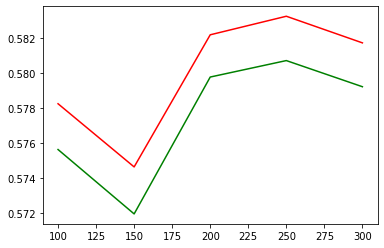

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.plot(list_n_estimators, list_test_set, color='green')
plt.plot(list_n_estimators, list_train_set, color='red')

plt.show()

In [39]:
list_test_set

[0.5756369920070498,
 0.5719744170516272,
 0.5797608311015952,
 0.5806971284586204,
 0.5792100679504038]

In [40]:
list_train_set

[0.5782416427428922,
 0.5746479131813687,
 0.5821635353486675,
 0.5832191647217843,
 0.5817045660560081]

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). (пример):

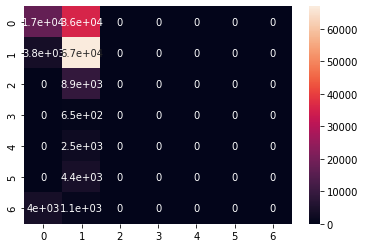

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_scores = confusion_matrix(y_test, data_y_pred)

confusion_df = pd.DataFrame(confusion_scores)
sb.heatmap( confusion_df, annot = True)

2. Бинарная классификация.

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [27]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

clf = RandomForestClassifier(n_estimators=250, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)

print('accuracy', accuracy_score(y_test, data_y_pred))
print('f1', f1_score(y_test, data_y_pred))
print('precision', precision_score(y_test, data_y_pred))
print('recall', recall_score(y_test, data_y_pred))
print(classification_report(y_test, data_y_pred))

accuracy 0.958041958041958
f1 0.9662921348314608
precision 0.9772727272727273
recall 0.9555555555555556
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



3. Использование нормализации признаков В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (StandardScalerили MinMaxScaler). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [25]:
#многоклассовый, нормализация помогла
df_X = df.drop(columns=['target'])
df_y = df['target']

scaled_X = StandardScaler().fit_transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, df_y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, data_y_pred))

0.5756369920070498


In [26]:
#бинарный, нормализация ничего не дала. скорее всего из-за особенностей набора данных
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)

scaled_X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25,random_state=0)

clf = RandomForestClassifier(n_estimators=250, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)

print('accuracy', accuracy_score(y_test, data_y_pred))
print('f1', f1_score(y_test, data_y_pred))
print('precision', precision_score(y_test, data_y_pred))
print('recall', recall_score(y_test, data_y_pred))
print(classification_report(y_test, data_y_pred))

accuracy 0.958041958041958
f1 0.9662921348314608
precision 0.9772727272727273
recall 0.9555555555555556
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

